
# Sales Data Clustering Analysis
This notebook contains a complete analysis of the given sales data to perform an unsupervised clustering analysis. Below are the key steps undertaken:
1. Exploratory Data Analysis (EDA)
2. Data Cleaning and Preprocessing
3. Feature Engineering
4. Clustering using K-Means
5. Results and Insights

## Requirements
- Python 3.10+
- Necessary libraries (version numbers included in `requirements.txt`)



# Data Exploration and Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import sklearn  # Ensure sklearn is imported explicitly
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Setting seed for reproducibility
np.random.seed(42)

# Displaying library versions
print("Versions of Libraries:")
print(f"Python: {sys.version}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

Versions of Libraries:
Python: 3.11.10 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:26) [MSC v.1929 64 bit (AMD64)]
pandas: 2.2.3
numpy: 1.24.3
scikit-learn: 1.1.3
matplotlib: 3.9.2
seaborn: 0.13.2


In [2]:
# load the dataset

sales = pd.read_csv('sales.csv')
sales.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

### Observations:
- Column naming convention is not consistent.
- Product_id, Product_type, Product,Product category must be string.
- Order Date must be datetime.

In [4]:
# Change column names

col_mapping = {'Area Code': 'area_code',
    'State': 'state',
    'Market': 'market',
    'Market Size': 'market_size',
    'Profit': 'profit',
    'Margin': 'gross_profit',
    'Sales': 'sales',
    'COGS': 'cogs',
    'Total Expenses': 'total_expenses',
    'Marketing': 'marketing',
    'Inventory': 'inventory',
    'Budget Profit': 'budget_profit',
    'Budget COGS': 'budget_cogs',
    'Budget Margin': 'budget_gross_profit',
    'Budget Sales': 'budget_sales',
    'ProductId': 'product_id',
    'Date': 'sale_date',
    'Product Type': 'product_type',
    'Product': 'product_description',
    'Type': 'product_category'}

sales.columns = [col_mapping[col] if col in col_mapping else col for col in sales.columns]
sales.head()

,area_code,state,market,market_size,profit,gross_profit,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_gross_profit,budget_sales,product_id,sale_date,product_type,product_description,product_category
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [5]:
# Convert columns to string

cols = ['product_id', 'product_type', 'product_description', 'product_category']
sales[cols] = sales[cols].astype('str')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_code            4248 non-null   int64  
 1   state                4248 non-null   object 
 2   market               4248 non-null   object 
 3   market_size          4248 non-null   object 
 4   profit               4248 non-null   float64
 5   gross_profit         4248 non-null   float64
 6   sales                4248 non-null   float64
 7   cogs                 4248 non-null   float64
 8   total_expenses       4248 non-null   float64
 9   marketing            4248 non-null   float64
 10  inventory            4248 non-null   float64
 11  budget_profit        4248 non-null   float64
 12  budget_cogs          4248 non-null   float64
 13  budget_gross_profit  4248 non-null   float64
 14  budget_sales         4248 non-null   float64
 15  product_id           4248 non-null   o

In [6]:
sales['sale_date'] = pd.to_datetime(sales['sale_date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   area_code            4248 non-null   int64         
 1   state                4248 non-null   object        
 2   market               4248 non-null   object        
 3   market_size          4248 non-null   object        
 4   profit               4248 non-null   float64       
 5   gross_profit         4248 non-null   float64       
 6   sales                4248 non-null   float64       
 7   cogs                 4248 non-null   float64       
 8   total_expenses       4248 non-null   float64       
 9   marketing            4248 non-null   float64       
 10  inventory            4248 non-null   float64       
 11  budget_profit        4248 non-null   float64       
 12  budget_cogs          4248 non-null   float64       
 13  budget_gross_profit  4248 non-nul

C:\Users\Sourabh\AppData\Local\Temp\ipykernel_23512\1073940216.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['sale_date'] = pd.to_datetime(sales['sale_date'])


In [7]:
# Create additional columns

#1. Gross Margin
sales['gross_margin'] = (round(sales['gross_profit'] / sales['sales'], 2))

# 2. Sales to COGS Ratio
sales['sales_to_cogs_ratio'] = sales['sales'] / sales['cogs']

# 3. Profit Margin Percentage
sales['profit_margin_percentage'] = (sales['profit'] / sales['sales']) * 100

# 4. Marketing to Sales Ratio
sales['marketing_to_sales_ratio'] = sales['marketing'] / sales['sales']

# 5. Gross Profit to Inventory Ratio
sales['gross_profit_to_inventory_ratio'] = sales['gross_profit'] / sales['inventory']

# 6. Budget vs Actual Profit Deviation
sales['budget_actual_profit_diff'] = sales['profit'] - sales['budget_profit']

# 7. Total Expenses to Sales Ratio
sales['expenses_to_sales_ratio'] = sales['total_expenses'] / sales['sales']

sales.head()

,area_code,state,market,market_size,profit,gross_profit,sales,cogs,total_expenses,marketing,...,product_type,product_description,product_category,gross_margin,sales_to_cogs_ratio,profit_margin_percentage,marketing_to_sales_ratio,gross_profit_to_inventory_ratio,budget_actual_profit_diff,expenses_to_sales_ratio
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Coffee,Columbian,Regular,0.60,2.517241,36.643836,0.130137,0.182952,-3.0,0.236301
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Coffee,Columbian,Regular,0.60,2.500000,33.333333,0.128889,0.117596,-15.0,0.266667
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Coffee,Columbian,Regular,0.60,2.500000,37.538462,0.129231,0.171958,-8.0,0.224615
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Coffee,Columbian,Regular,0.60,2.513043,36.332180,0.128028,0.149228,-5.0,0.238754
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Coffee,Columbian,Regular,0.61,2.477778,46.636771,0.130045,0.117596,14.0,0.251121


In [8]:
# Extract date, period, day, hour and create individual columns

sales['period'] = sales['sale_date'].dt.to_period('M')
sales['dow'] = sales['sale_date'].dt.day_name()
sales['hour'] = sales['sale_date'].dt.strftime('%I %p')
sales['date'] = sales['sale_date'].dt.date
sales['year'] = sales['sale_date'].dt.year
sales.head()

,area_code,state,market,market_size,profit,gross_profit,sales,cogs,total_expenses,marketing,...,profit_margin_percentage,marketing_to_sales_ratio,gross_profit_to_inventory_ratio,budget_actual_profit_diff,expenses_to_sales_ratio,period,dow,hour,date,year
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,36.643836,0.130137,0.182952,-3.0,0.236301,2010-04,Thursday,12 AM,2010-04-01,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,33.333333,0.128889,0.117596,-15.0,0.266667,2010-07,Thursday,12 AM,2010-07-01,2010
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,37.538462,0.129231,0.171958,-8.0,0.224615,2010-11,Monday,12 AM,2010-11-01,2010
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,36.332180,0.128028,0.149228,-5.0,0.238754,2010-12,Wednesday,12 AM,2010-12-01,2010
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,46.636771,0.130045,0.117596,14.0,0.251121,2011-07,Friday,12 AM,2011-07-01,2011


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   area_code                        4248 non-null   int64         
 1   state                            4248 non-null   object        
 2   market                           4248 non-null   object        
 3   market_size                      4248 non-null   object        
 4   profit                           4248 non-null   float64       
 5   gross_profit                     4248 non-null   float64       
 6   sales                            4248 non-null   float64       
 7   cogs                             4248 non-null   float64       
 8   total_expenses                   4248 non-null   float64       
 9   marketing                        4248 non-null   float64       
 10  inventory                        4248 non-null   float64    

In [10]:
# Check category
sales['product_category'].value_counts()

product_category
Regular    2400
Decaf      1848
Name: count, dtype: int64

In [11]:
# Check product

sales['product_description'].value_counts()

product_description
Columbian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Darjeeling           384
Decaf Irish Cream    384
Chamomile            384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             192
Regular Espresso      72
Name: count, dtype: int64

In [12]:
# Check the products under category 'Regular'

sales[sales['product_category'] == 'Regular']['product_description']

0         Columbian
1         Columbian
2         Columbian
3         Columbian
4         Columbian
           ...     
4243    Caffe Latte
4244    Caffe Latte
4245    Caffe Latte
4246    Caffe Latte
4247    Caffe Latte
Name: product_description, Length: 2400, dtype: object

In [13]:
# Check the products under category 'Decaf'

sales[sales['product_category'] == 'Decaf']['product_description']

24      Decaf Espresso
25      Decaf Espresso
26      Decaf Espresso
27      Decaf Espresso
28      Decaf Espresso
             ...      
4236             Lemon
4237             Lemon
4238             Lemon
4239             Lemon
4240             Lemon
Name: product_description, Length: 1848, dtype: object

In [14]:
sales['state'].value_counts()

state
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: count, dtype: int64

In [15]:
sales.describe(include = 'object')

,state,market,market_size,product_id,product_type,product_description,product_category,dow,hour,date
count,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248
unique,20,4,2,13,4,13,2,7,1,24
top,Utah,West,Small Market,2,Espresso,Columbian,Regular,Thursday,12 AM,2010-04-01
freq,288,1344,2544,480,1176,480,2400,708,4248,177


In [16]:
sales.describe()

,area_code,profit,gross_profit,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,...,budget_sales,sale_date,gross_margin,sales_to_cogs_ratio,profit_margin_percentage,marketing_to_sales_ratio,gross_profit_to_inventory_ratio,budget_actual_profit_diff,expenses_to_sales_ratio,year
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,...,4248.000000,4248,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,...,175.649718,2010-12-16 00:00:00,0.479301,inf,14.716937,0.188037,0.147555,0.184322,0.360876,2010.500000
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,...,0.000000,2010-01-01 00:00:00,-15.890000,0.062914,-3190.000000,0.000000,-7.777778,-369.000000,0.069803,2010.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,...,80.000000,2010-06-23 12:00:00,0.540000,2.294482,16.095135,0.114035,0.086229,-14.000000,0.211122,2010.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,...,130.000000,2010-12-16 12:00:00,0.560000,2.435771,32.000000,0.130872,0.163251,-4.000000,0.282155,2010.500000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,...,210.000000,2011-06-08 12:00:00,0.590000,2.520000,42.784146,0.152927,0.209246,9.000000,0.402985,2011.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,...,1140.000000,2011-12-01 00:00:00,1.000000,inf,118.085106,6.000000,11.333333,249.000000,7.736842,2011.000000
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,...,148.891522,NaN,0.898736,NaN,155.423512,0.338737,0.323852,38.739774,0.442195,0.500059


In [17]:
# Check the transactions per period

sales.groupby('period').agg({
                        'sales': 'sum',
                        'profit': 'sum'})

,sales,profit
period,,
2010-01,31555.0,8041.0
2010-02,32092.0,8369.0
2010-03,32245.0,8365.0
2010-04,32943.0,8670.0
2010-05,33692.0,8947.0
2010-06,35125.0,9571.0
2010-07,36161.0,9905.0
2010-08,36029.0,9566.0
2010-09,33092.0,8508.0


In [18]:
# Count records for each year
record_counts = sales['year'].value_counts()
print("Record counts by year:")
print(record_counts)

Record counts by year:
year
2010    2124
2011    2124
Name: count, dtype: int64


In [19]:
# Check for missing values
sales.isnull().sum()

area_code                          0
state                              0
market                             0
market_size                        0
profit                             0
gross_profit                       0
sales                              0
cogs                               0
total_expenses                     0
marketing                          0
inventory                          0
budget_profit                      0
budget_cogs                        0
budget_gross_profit                0
budget_sales                       0
product_id                         0
sale_date                          0
product_type                       0
product_description                0
product_category                   0
gross_margin                       0
sales_to_cogs_ratio                0
profit_margin_percentage           0
marketing_to_sales_ratio           0
gross_profit_to_inventory_ratio    0
budget_actual_profit_diff          0
expenses_to_sales_ratio            0
p

In [20]:
# Check for duplicate records
sales.duplicated().sum()

0

In [21]:
# load the preprocessed dataframe to .pkl and csv files in local folder
sales.to_pickle('sales_data.pkl')
sales.to_csv('sales_data.csv')

# Exploratory Data Analysis

## 1. 2010-2011 Sales Performance

In [22]:
# Filter dataset for the year 2010
#sales = sales[sales['year'] == 2010]

# Calculate metrics
total_sales = sales['sales'].sum()
total_profit = sales['profit'].sum()  # Assuming 'profit' represents gross profit
gross_margin = (total_profit / total_sales) * 100 if total_sales != 0 else 0


print(f'Total Sales or GMV for 2010-11 is: ${total_sales / 1000000: .2f} M')
print(f'Total Profit for 2010-11 is: ${total_profit / 1000000: .2f} M')
print(f'Gross Margin for 2010-11: {gross_margin: .2f} %')

Total Sales or GMV for 2010-11 is: $ 0.82 M
Total Profit for 2010-11 is: $ 0.26 M
Gross Margin for 2010-11:  31.66 %


## 2. What are the highest- performing products?
a. Based on profit
b. Based on sales


In [23]:
# What are the top 5 highest-performing products based on profit?

top5_prod_profit = sales.groupby(['product_description'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_prod_profit

product_description
Columbian         77252.0
Lemon             52418.0
Caffe Mocha       45084.0
Decaf Espresso    43162.0
Chamomile         42552.0
Name: gross_profit, dtype: float64

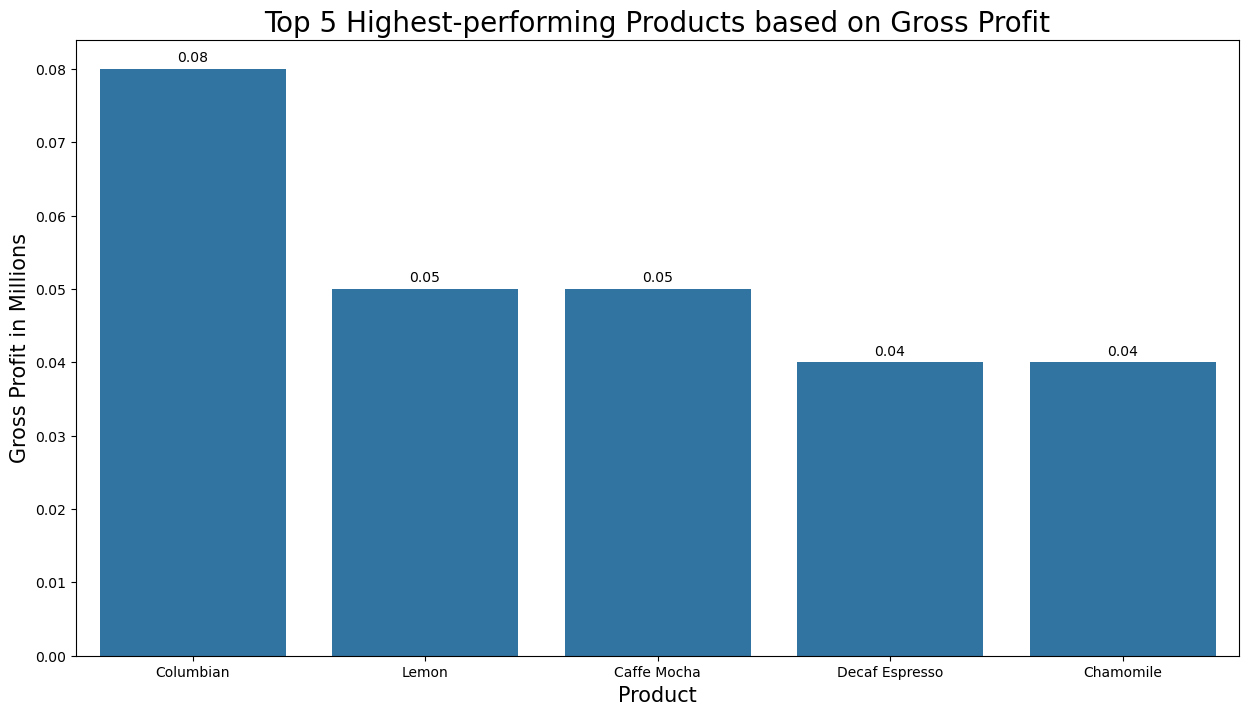

In [24]:
# Visualize the top 5 highest-performing products based on profit

top5_prod_profit = (sales.groupby(['product_description'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_profit.index, y = top5_prod_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Gross Profit', size = 20)
plt.xlabel('Product', size = 15)
plt.ylabel('Gross Profit in Millions', size = 15)
plt.show;

In [25]:
# What are the top 5 highest-performing products based on total sales?
top5_prod_sales = sales.groupby(['product_description'])['sales'].sum().sort_values(ascending=False)[:5]
top5_prod_sales

product_description
Columbian         128311.0
Lemon              95926.0
Caffe Mocha        84904.0
Decaf Espresso     78162.0
Chamomile          75578.0
Name: sales, dtype: float64

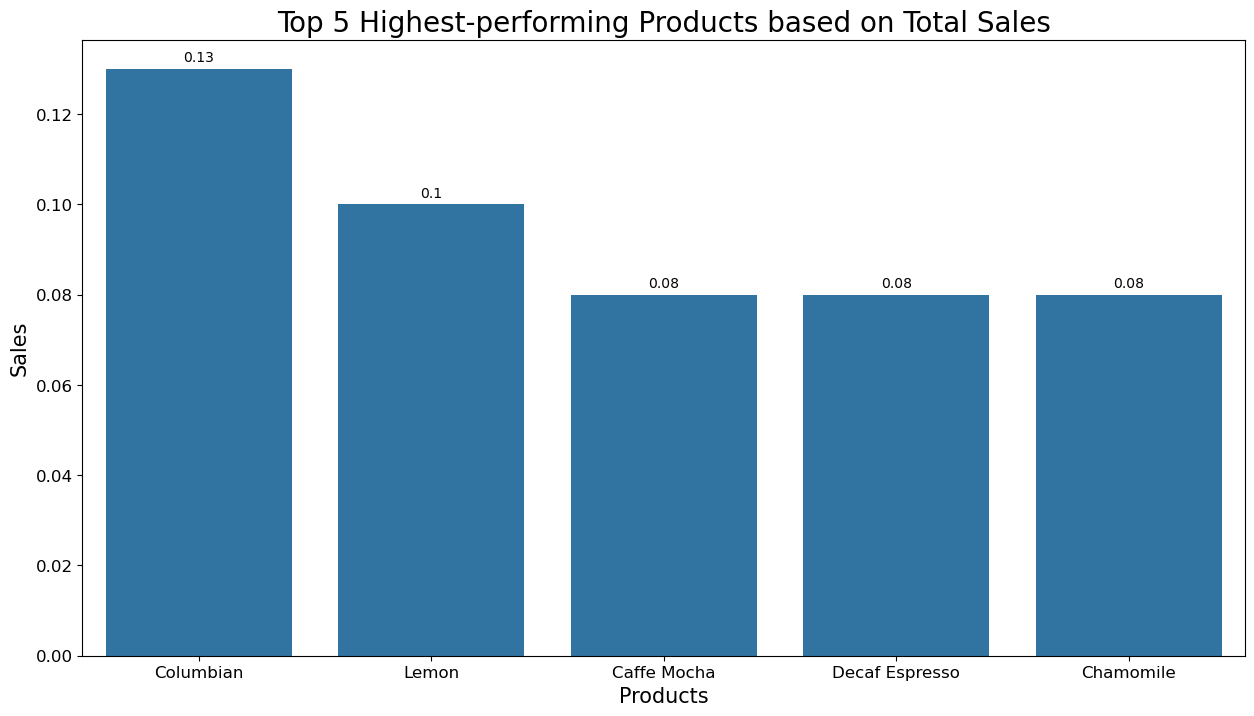

In [26]:
# Visualize top 5 highest-performing products based on total sales

top5_prod_sales = (sales.groupby(['product_description'])['sales'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_sales.index, y = top5_prod_sales.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3) 

plt.title('Top 5 Highest-performing Products based on Total Sales', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Sales', size = 15)
plt.show;

- The top-performing product, **Columbian**, leads in both total sales and gross profit, with approximately $0.13M in sales and $0.08M in gross profit, demonstrating its dominance in financial contribution. 
- **Lemon** and **Caffe Mocha** follow as significant contributors, both achieving around $0.1M in sales and $0.05M in gross profit. 
- Products like **Decaf Espresso** and **Chamomile** round out the top five, each contributing approximately $0.08M in sales and $0.04M in gross profit. 
- These insights highlight the importance of Columbian in driving revenue and profitability while showcasing the balanced performance of other leading products.

## 3. Columbian Coffee Performance Over Time

In [27]:
# Columbian Coffee monthly sales

columbian_sales = sales[sales['product_description'] == 'Columbian'].groupby(['period'])['sales'].sum().reset_index()
columbian_sales

,period,sales
0,2010-01,4860.0
1,2010-02,4821.0
2,2010-03,4904.0
3,2010-04,5048.0
4,2010-05,5252.0
5,2010-06,5748.0
6,2010-07,5959.0
7,2010-08,6014.0
8,2010-09,5325.0
9,2010-10,4902.0


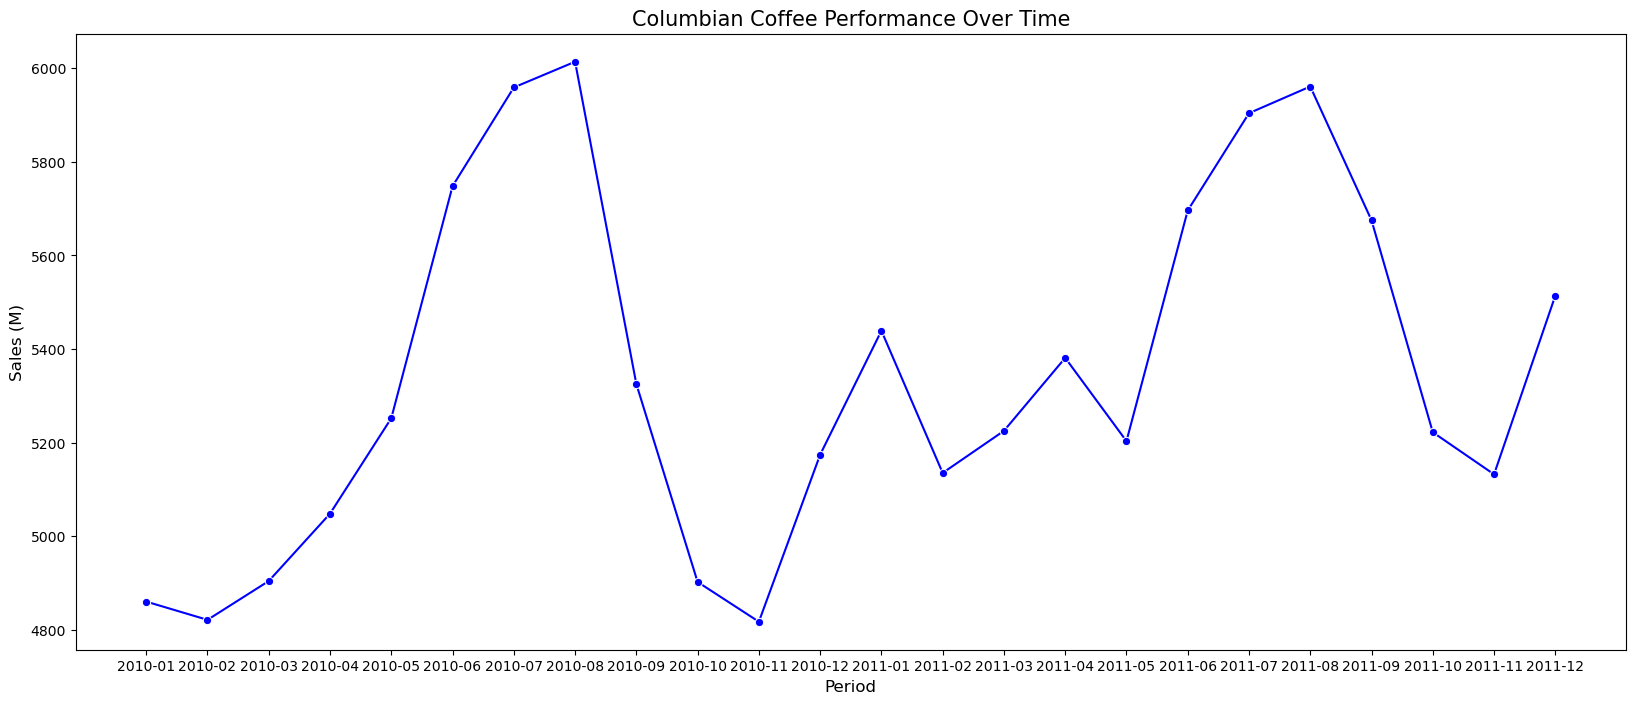

In [28]:
# Visualize Columbian Coffee Performance Over Time

columbian_sales = sales[sales['product_description'] == 'Columbian'].groupby(['period'])['sales'].sum().reset_index()

plt.figure(figsize = [20, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=columbian_sales, x = columbian_sales['period'].astype(str), y = 'sales', color = 'blue', marker = 'o')

plt.title('Columbian Coffee Performance Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales (M)', size = 12)
plt.show()

- The performance of **Columbian Coffee** shows significant seasonal fluctuations in sales over time. 
- Sales peaked notably during mid-2010 (July-August) and mid-2011 (June-July), reaching approximately $6,000M, indicating strong seasonal demand during these periods. 
- Sales experienced a steep decline after the peaks, particularly in late 2010 and late 2011, but showed recovery in subsequent months. 
- This trend highlights the product's sensitivity to seasonal factors and potential for targeted marketing strategies to maximize revenue during high-demand months.

# 4. What are the higest-performing categories?
a. Based on profit  
b. Based on sales

In [29]:
# What are the top highest-performing categories based on profit?

top5_cat_profit = sales.groupby(['product_category'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_cat_profit

product_category
Regular    258506.0
Decaf      184532.0
Name: gross_profit, dtype: float64

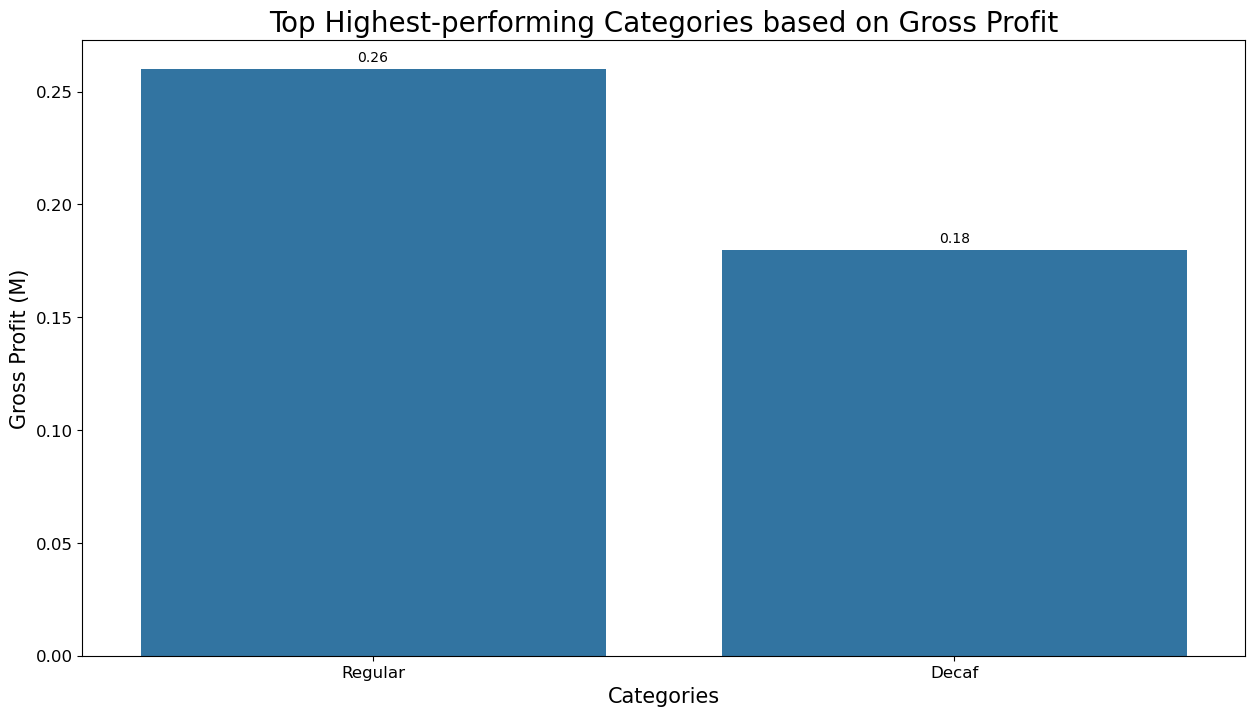

In [30]:
# Visualize the top highest-performing categories based on profit

top5_cat_profit = (sales.groupby(['product_category'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_cat_profit.index, y = top5_cat_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top Highest-performing Categories based on Gross Profit', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Gross Profit (M)', size = 15)
plt.show;

In [31]:
# What are the top highest-performing categories based on sales?

top5_cat_sales = sales.groupby(['product_category'])['sales'].sum().sort_values(ascending=False)[:5]
top5_cat_sales

product_category
Regular    472187.0
Decaf      347624.0
Name: sales, dtype: float64

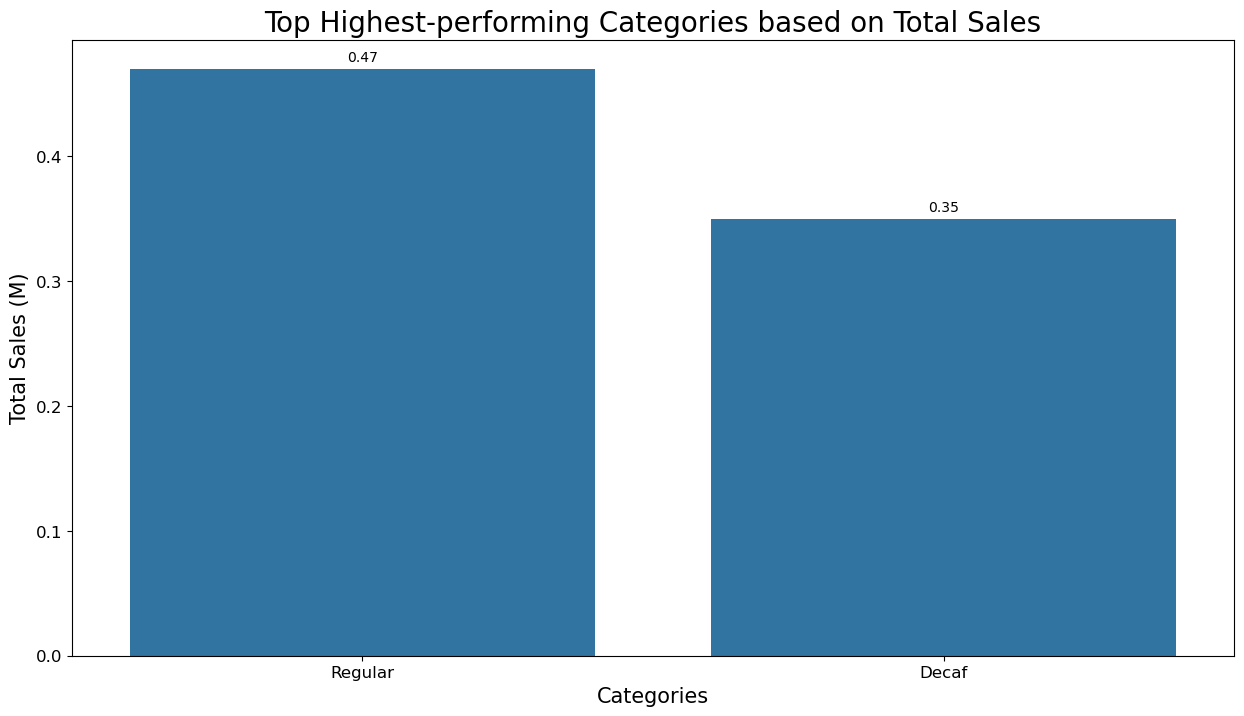

In [32]:
# Visualize the top highest-performing categories based on sales

top5_cat_sales = (sales.groupby(['product_category'])['sales'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_cat_sales.index, y = top5_cat_sales.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top Highest-performing Categories based on Total Sales', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Total Sales (M)', size = 15)
plt.show;

- The **Regular** category outperforms the **Decaf** category in both total sales and gross profit. 
- Regular products generated approximately $0.47M in sales and $0.26M in gross profit, while Decaf products contributed $0.35M in sales and $0.18M in gross profit. 
- This indicates that Regular products not only dominate revenue generation but also yield higher profitability, making them the top-performing category overall.

## 5. Sales Performance and Gross Profit Over Time

In [33]:
# Monthly sales and profit

monthly_perf = sales.groupby(['period']).agg({
                                                'sales': 'sum',
                                                'gross_profit': 'sum',
    'profit':'sum'
}).reset_index()
monthly_perf

,period,sales,gross_profit,profit
0,2010-01,31555.0,17378.0,8041.0
1,2010-02,32092.0,17762.0,8369.0
2,2010-03,32245.0,17803.0,8365.0
3,2010-04,32943.0,18242.0,8670.0
4,2010-05,33692.0,18618.0,8947.0
5,2010-06,35125.0,19457.0,9571.0
6,2010-07,36161.0,20012.0,9905.0
7,2010-08,36029.0,19736.0,9566.0
8,2010-09,33092.0,18124.0,8508.0
9,2010-10,32849.0,18186.0,8674.0


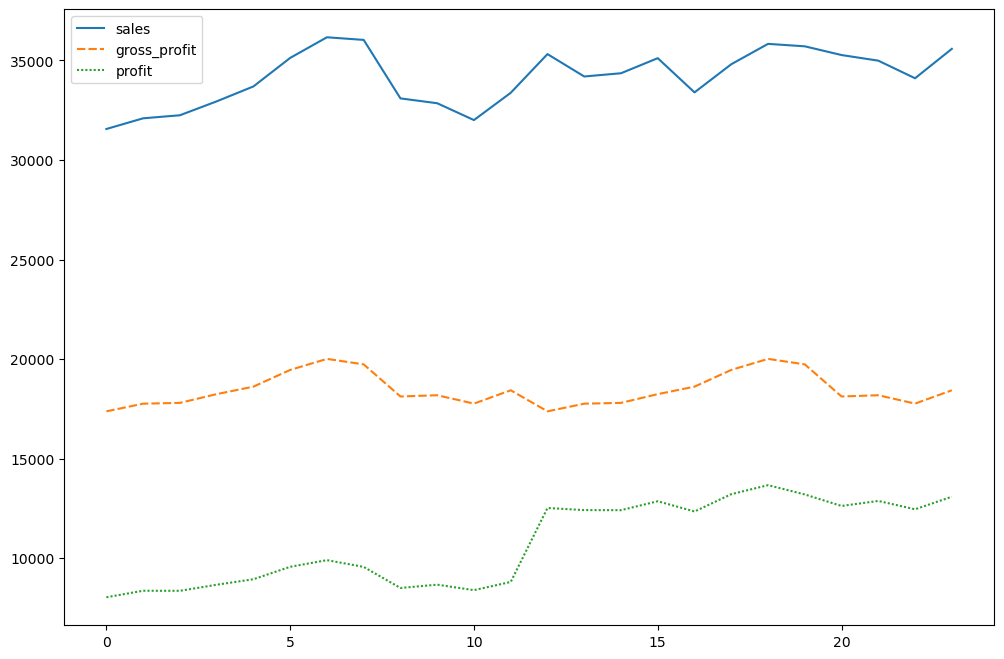

In [34]:
plt.figure(figsize = [12, 8])
ax = sns.lineplot(data = monthly_perf)

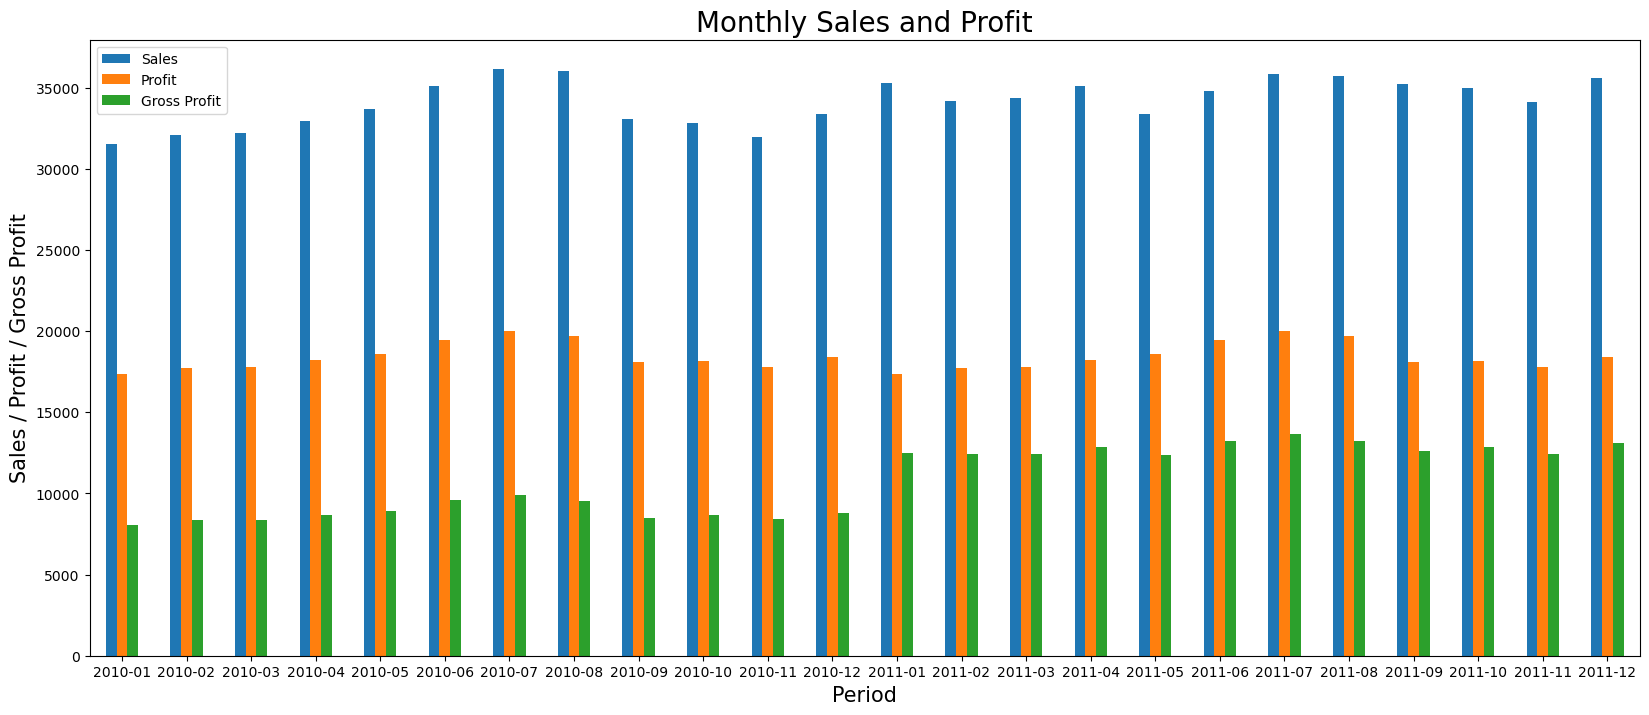

In [35]:
# Visualize monthly sales vs monthly profit (stacked bar)

monthly_perf.plot(kind='bar', x = 'period', figsize = (20, 8))
plt.title('Monthly Sales and Profit', fontsize = 20)
plt.xlabel('Period', fontsize = 15)
plt.ylabel('Sales / Profit / Gross Profit', fontsize = 15)
plt.legend(["Sales", "Profit","Gross Profit"])
plt.rcParams["axes.formatter.limits"] = (0, 4000000)
plt.xticks(rotation = 360)
plt.show()

- The charts highlight consistent trends in monthly sales and profits over time. Sales consistently exceed profit, showing strong revenue generation but with room to improve profit margins. 
- Peaks in sales during mid-year align with higher profits, reflecting seasonal demand patterns. 
- Overall, the trends indicate steady performance, with opportunities to optimize costs and improve profitability.

## 6. Statistical relationships between quantity, price, cost, sales, pross_profit, gross_margin, and hour

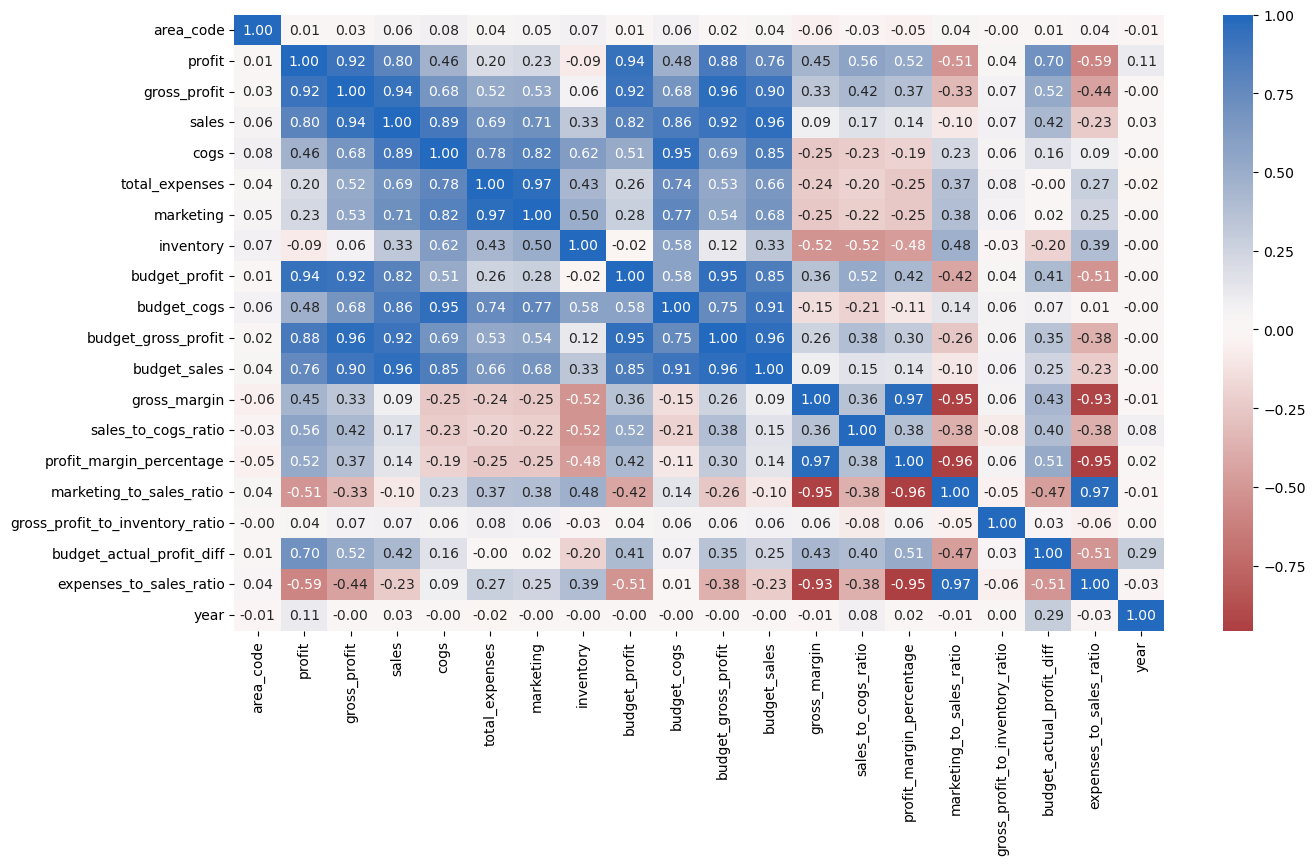

In [36]:
# create a correlation plot between numerical variables
num_var = sales.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize = [15, 8])
sns.heatmap(sales[num_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

The correlation heatmap reveals several significant relationships among the variables:

1. **Profit and Gross Profit**: A strong positive correlation (\(0.92\)) indicates that gross profit largely drives profit.

2. **Sales and Gross Profit**: A very high correlation (\(0.94\)) shows that gross profit is strongly tied to sales performance.

3. **Profit and Budget Profit**: The high correlation (\(0.94\)) suggests budget targets for profit closely align with actual performance.

4. **COGS (Cost of Goods Sold)**: Strongly correlated with sales (\(0.89\)), indicating that higher sales are tied to higher production costs.

5. **Marketing and Total Expenses**: Marketing has a near-perfect correlation (\(0.97\)) with total expenses, highlighting its significant contribution to overall costs.

6. **Negative Correlations**:
   - **Expenses to Sales Ratio and Profit** (\(-0.59\)): Indicates that higher relative expenses reduce profitability.
   - **Marketing to Sales Ratio and Gross Margin** (\(-0.95\)): Suggests that increased marketing expenses as a percentage of sales negatively impact the gross margin.

This analysis highlights critical cost drivers, such as marketing and COGS, and reinforces the alignment of budgeted metrics with actual performance. Optimization in cost management, particularly in marketing, could enhance profitability and gross margins.

## 7. Compare product performance:
    a. Do the most profitable products also have the highest sales?
    b. Do products with high sales also have high profit margins?

In [37]:
prod_perf = sales.groupby(['product_description']).agg({
                                'sales': 'sum',
                                'gross_margin': 'mean',
                                'gross_profit': 'sum',
}).sort_values('sales', ascending=False)
prod_perf

,sales,gross_margin,gross_profit
product_description,,,
Columbian,128311.0,0.583417,77252.0
Lemon,95926.0,0.542833,52418.0
Caffe Mocha,84904.0,0.491917,45084.0
Decaf Espresso,78162.0,0.581691,43162.0
Chamomile,75578.0,0.568828,42552.0
Darjeeling,73151.0,0.573385,41064.0
Earl Grey,66772.0,0.560486,36786.0
Decaf Irish Cream,62248.0,0.495729,31370.0
Caffe Latte,35899.0,0.598241,19824.0


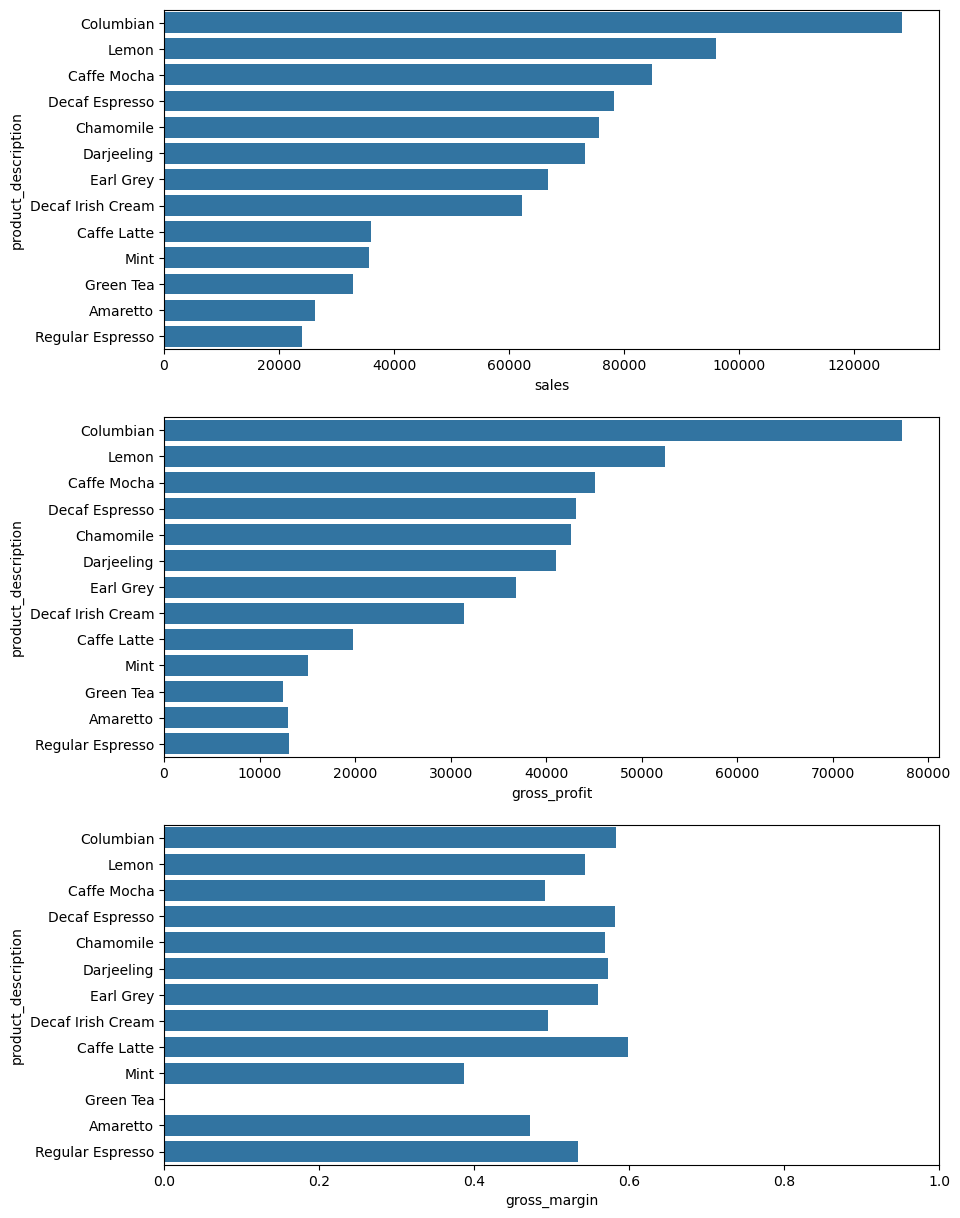

In [38]:
plt.figure(figsize = [10, 15])
base_color = sns.color_palette()[0]

# Subplot 1: total sales per product
ax1 = plt.subplot(3, 1, 1)
sns.barplot( x = prod_perf['sales'], y = prod_perf.index, color = base_color)

# Subplot 2: total profit per product
ax2 = plt.subplot(3, 1, 2)
sns.barplot(x = prod_perf['gross_profit'], y = prod_perf.index, color = base_color)


# Subplot 4: average gross margin per product
ax4 = plt.subplot(3, 1, 3)
sns.barplot(x = prod_perf['gross_margin'], y = prod_perf.index, color = base_color)
ax4.set_xlim(0, 1)

plt.show()

Based on the provided visualizations, here are the answers to the questions:

a. Do the most profitable products also have the highest sales?
- **Yes, to some extent.**  
  - **Columbian** is both the most profitable product (highest gross profit) and has the highest sales, indicating a strong relationship between profitability and sales volume for this product.    
  - However, products like **Caffe Latte** and **Decaf Irish Cream** have lower sales but still generate relatively high gross profit, suggesting that sales alone do not always directly drive profitability for all products.

b. Do products with high sales also have high profit margins?
- **Not always.**  
  - **Columbian**, **Lemon**, and **Caffe Mocha** demonstrate both high sales and high gross margins, indicating efficient profitability.  
  - However, products like **Chamomile** and **Regular Espresso** have relatively high sales but do not feature among the highest gross margin products. This suggests that high sales do not necessarily translate into higher profit margins, as operational or production costs may vary.

Conclusion:
While some products like **Columbian** excel in both sales and profitability, others highlight the need to analyze margins independently of sales to optimize overall performance. Balancing sales growth with cost efficiency is crucial for sustained profitability.

## 8. Compare sales across all states

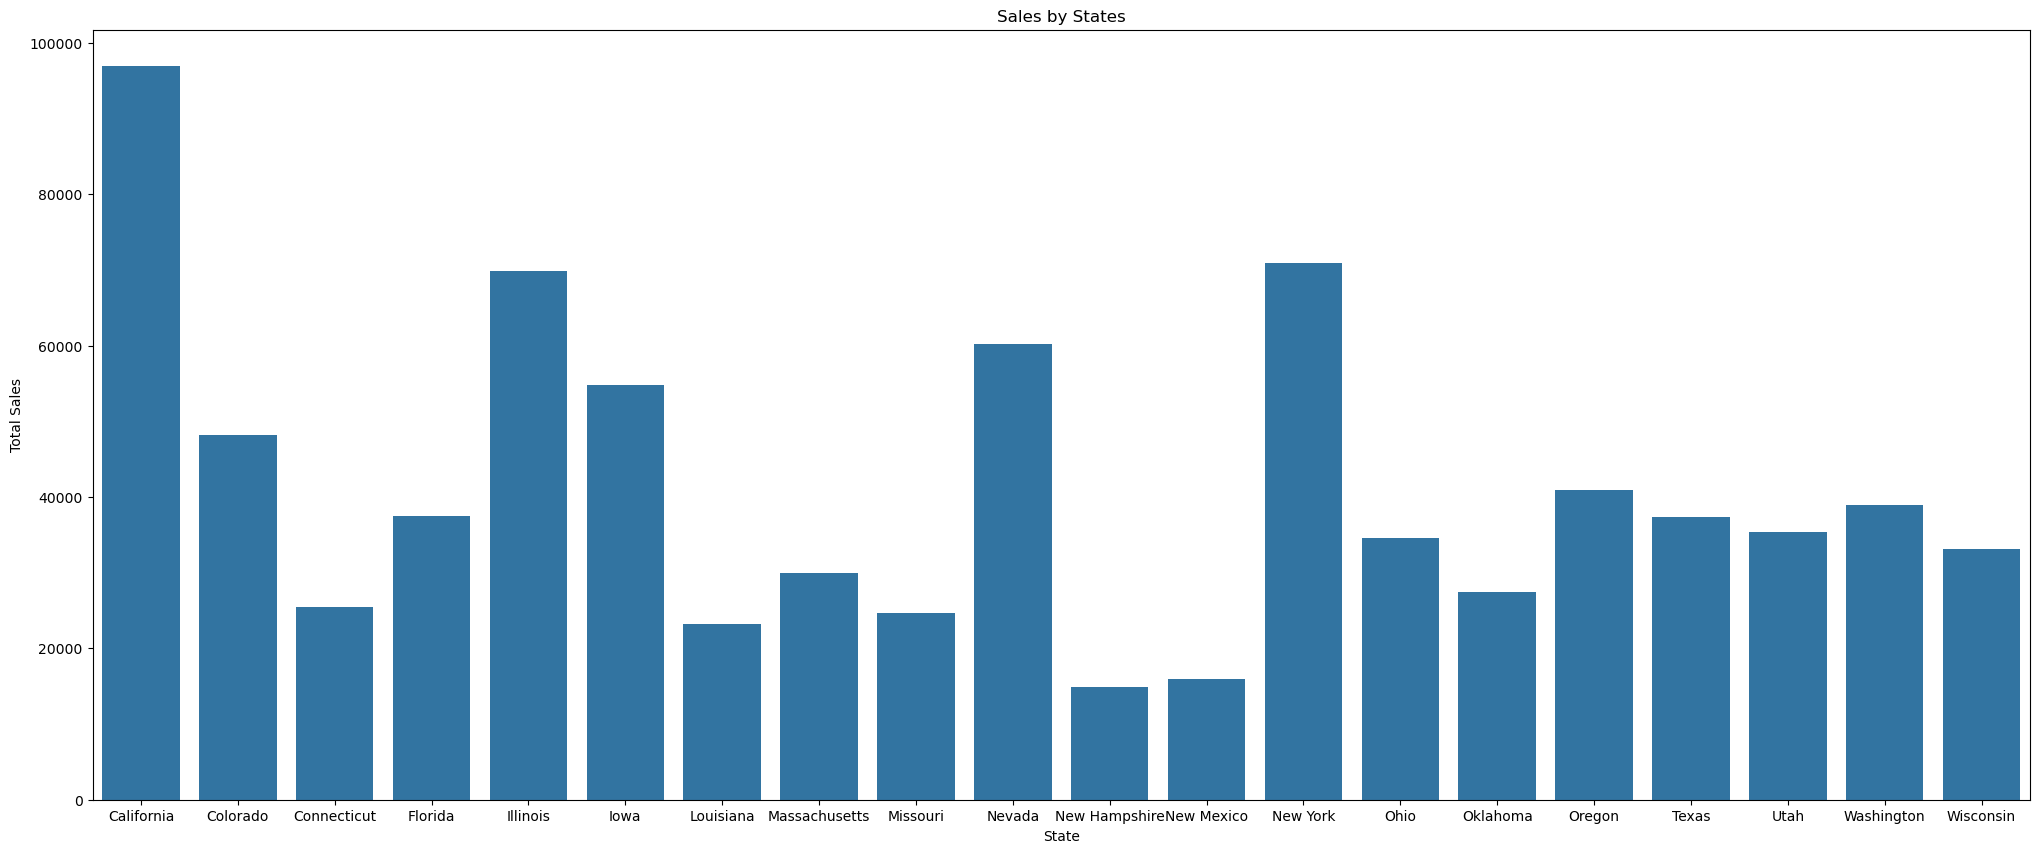

In [39]:
city_sales = sales.groupby(['state'])['sales'].sum()

plt.figure(figsize = [25, 10])
base_color = sns.color_palette()[0]

sns.barplot(x = city_sales.index, y = city_sales.values, color = base_color)
plt.title('Sales by States')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show();

The bar chart showcases total sales by city, with **California** leading significantly, contributing nearly $100,000 in sales, indicating its dominance in revenue generation. **New York** and **Illinois** also perform strongly, reflecting substantial sales volumes in these regions. States like **Nevada**, **Florida**, and **Texas** show moderate sales, while **New Mexico** and **New Hampshire** are among the lowest contributors. 

This analysis suggests focusing on top-performing states like California and New York for further growth, while exploring strategies to boost sales in underperforming regions.

## 9. Which day of the week generated the highest sales and highest profit?

In [40]:
# Convert hour and dow columns into ordered categorical types

ordered_var_dict = {
                   'dow': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordered_var_dict:
    ordered_var = pd.CategoricalDtype(categories = ordered_var_dict[var], ordered = True)
    sales[var] = sales[var].astype(ordered_var)

In [41]:
# total sales and total profit per day of the week

day = sales.groupby(['dow']).agg({
                                    'sales': 'sum',
                                    'gross_profit': 'sum'}).reset_index().sort_values(by = 'dow')
day

C:\Users\Sourabh\AppData\Local\Temp\ipykernel_23512\1540010154.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day = sales.groupby(['dow']).agg({


,dow,sales,gross_profit
0,Monday,132047.0,73067.0
1,Tuesday,137775.0,72788.0
2,Wednesday,101272.0,56016.0
3,Thursday,139953.0,74813.0
4,Friday,135346.0,73818.0
5,Saturday,103995.0,54182.0
6,Sunday,69423.0,38354.0


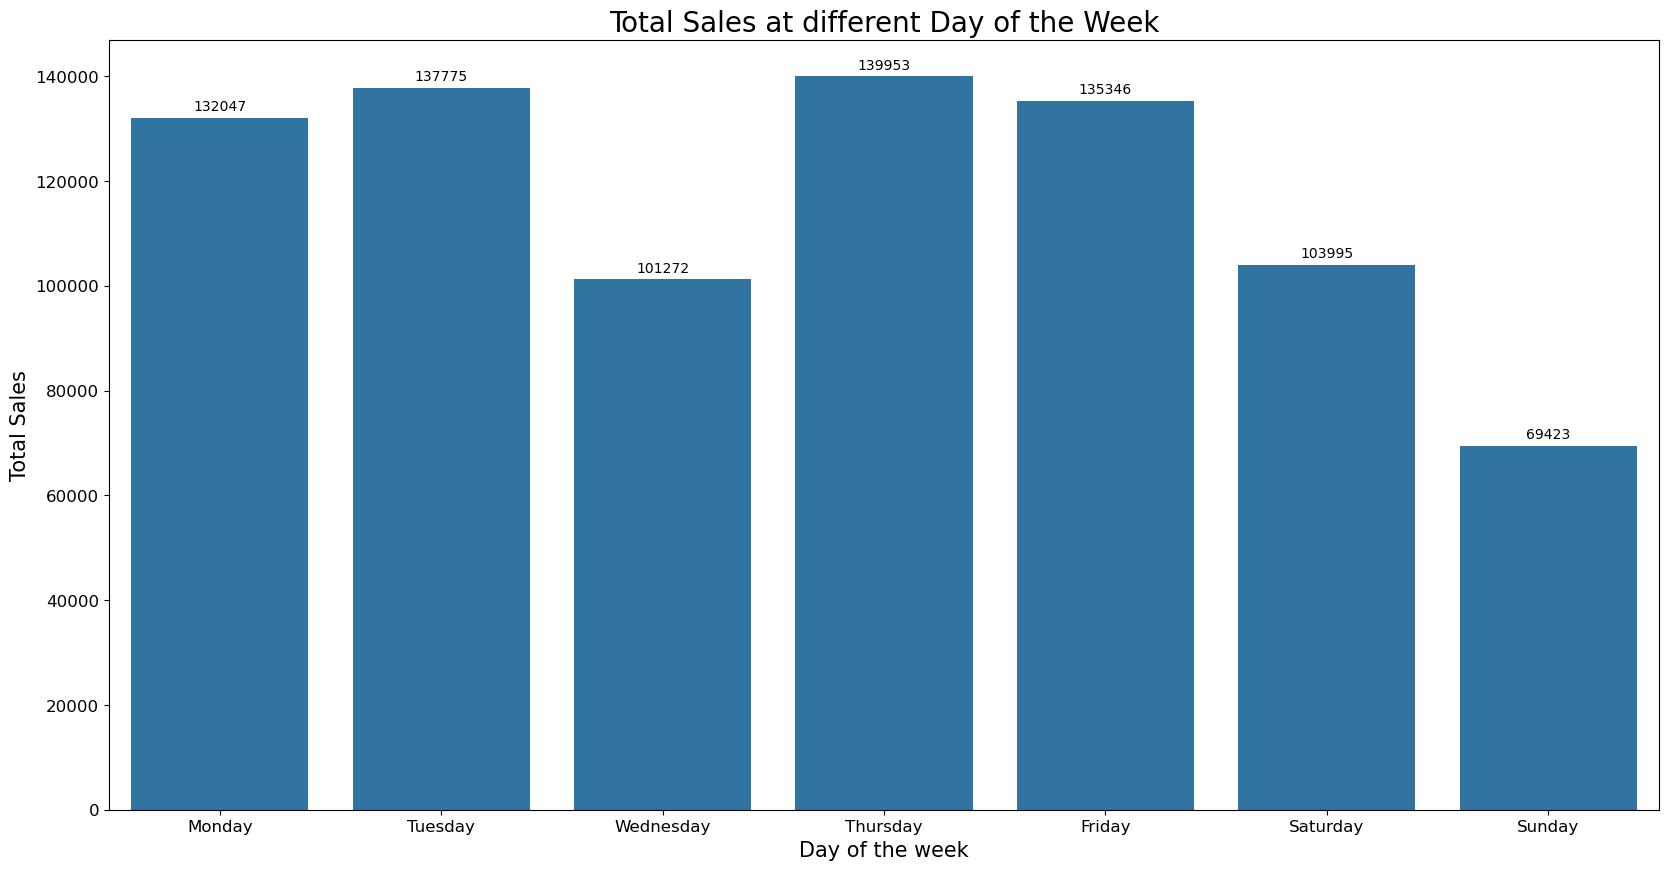

In [42]:
plt.figure(figsize = [20, 10]) 
base_color = sns.color_palette()[0]

ax = sns.barplot(data = day, x = day['dow'], y = day['sales'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Sales at different Day of the Week', size = 20)
plt.xlabel('Day of the week', size = 15)
plt.ylabel('Total Sales', size = 15)

plt.show();

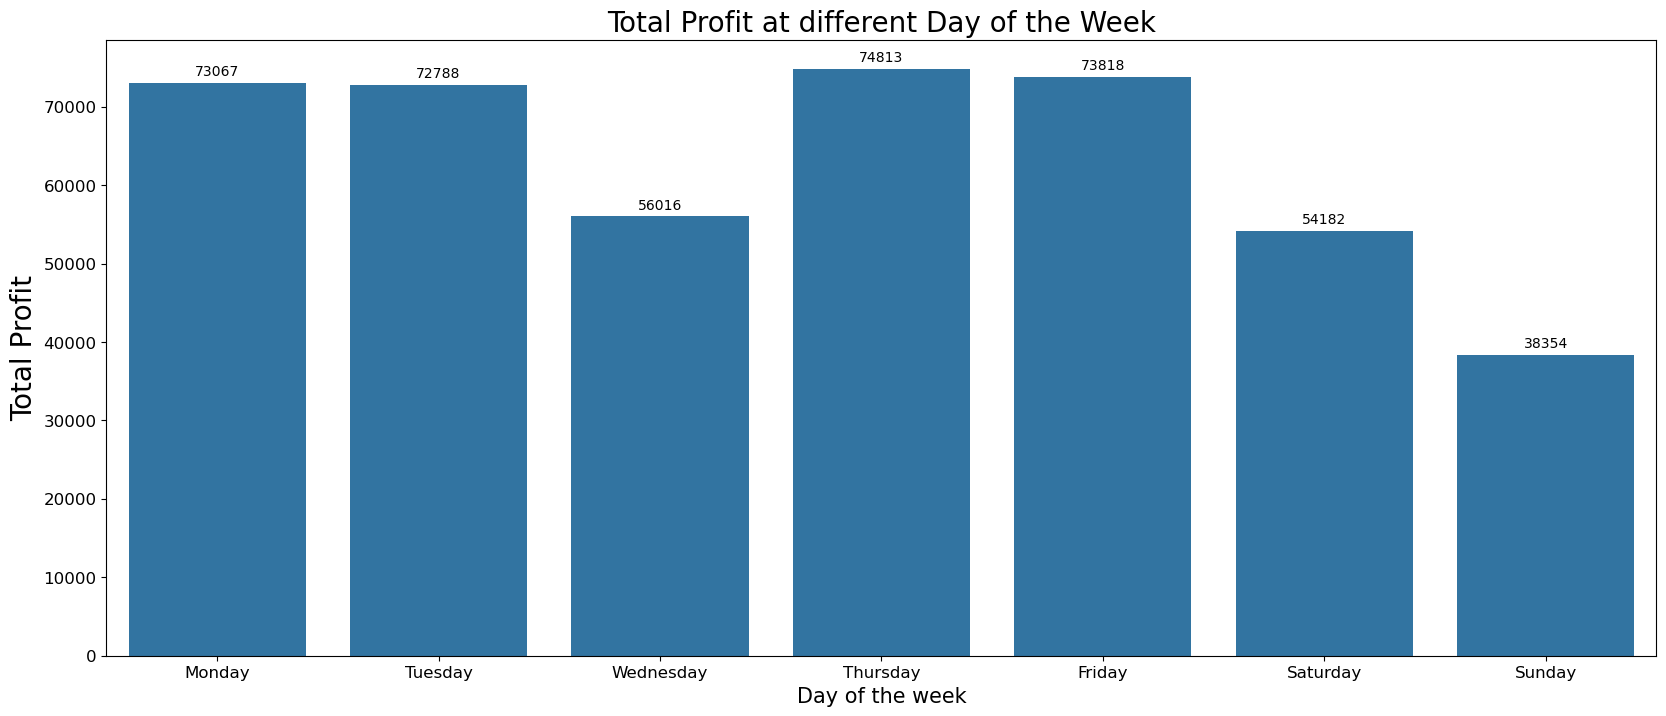

In [43]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(data = day, x = day['dow'], y = day['gross_profit'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Profit at different Day of the Week', size = 20)
plt.xlabel('Day of the week', size = 15)
plt.ylabel('Total Profit', size = 20)

plt.show();

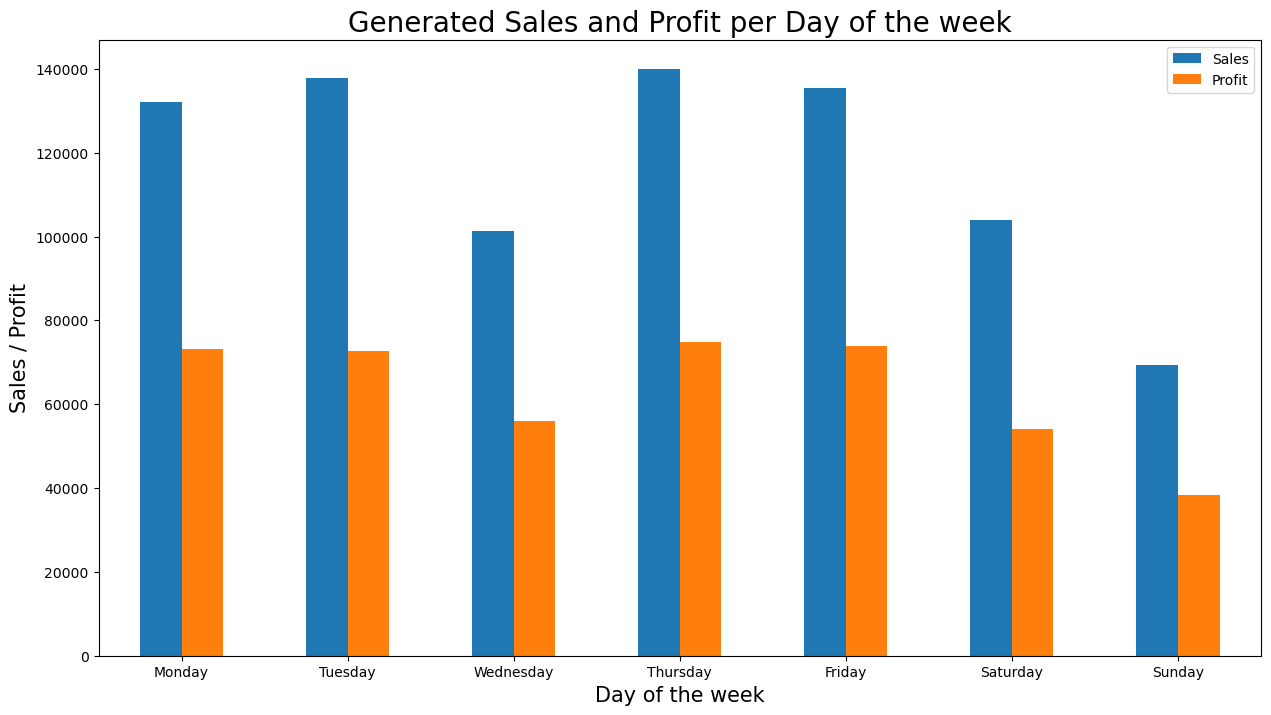

In [44]:
# Visualize monthly sales vs monthly profit (grouped bar)

day.plot(kind='bar', x = 'dow', figsize = (15, 8))
plt.title('Generated Sales and Profit per Day of the week', fontsize = 20)
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('Sales / Profit', fontsize = 15)
plt.legend(["Sales", "Profit"])
plt.xticks(rotation = 360)
plt.show()

The visualizations of sales and profit by day of the week provide the following insights:

1. **Sales Performance**:
   - Sales peak on **Thursday** (\$139,953), followed by **Friday** (\$135,346) and **Tuesday** (\$137,775).
   - **Sunday** shows the lowest sales (\$69,423), indicating it is the least active sales day.

2. **Profit Performance**:
   - Profit is highest on **Thursday** (\$74,813), closely followed by **Friday** (\$73,818) and **Monday** (\$73,067).
   - Like sales, **Sunday** has the lowest profit (\$38,354), reflecting reduced activity or profitability on weekends.

3. **Correlation Between Sales and Profit**:
   - Sales and profit show a proportional relationship, with higher sales days generally driving higher profits.
   - The dip in both metrics on weekends suggests lower customer engagement or reduced operations.

### Conclusion:
**Thursday and Friday** are the most profitable and highest sales days, highlighting these as key business days for revenue generation. **Sunday** represents an opportunity for improvement through targeted promotions or campaigns to boost activity.

## 10. Monthly Sales Growth Rate

In [45]:
monthly_sales = sales.groupby(['period'])['sales'].sum().reset_index()
monthly_sales

,period,sales
0,2010-01,31555.0
1,2010-02,32092.0
2,2010-03,32245.0
3,2010-04,32943.0
4,2010-05,33692.0
5,2010-06,35125.0
6,2010-07,36161.0
7,2010-08,36029.0
8,2010-09,33092.0
9,2010-10,32849.0


In [46]:
monthly_sales['pct_change'] = monthly_sales['sales'].pct_change()
monthly_sales

,period,sales,pct_change
0,2010-01,31555.0,NaN
1,2010-02,32092.0,0.017018
2,2010-03,32245.0,0.004768
3,2010-04,32943.0,0.021647
4,2010-05,33692.0,0.022736
5,2010-06,35125.0,0.042532
6,2010-07,36161.0,0.029495
7,2010-08,36029.0,-0.003650
8,2010-09,33092.0,-0.081518
9,2010-10,32849.0,-0.007343


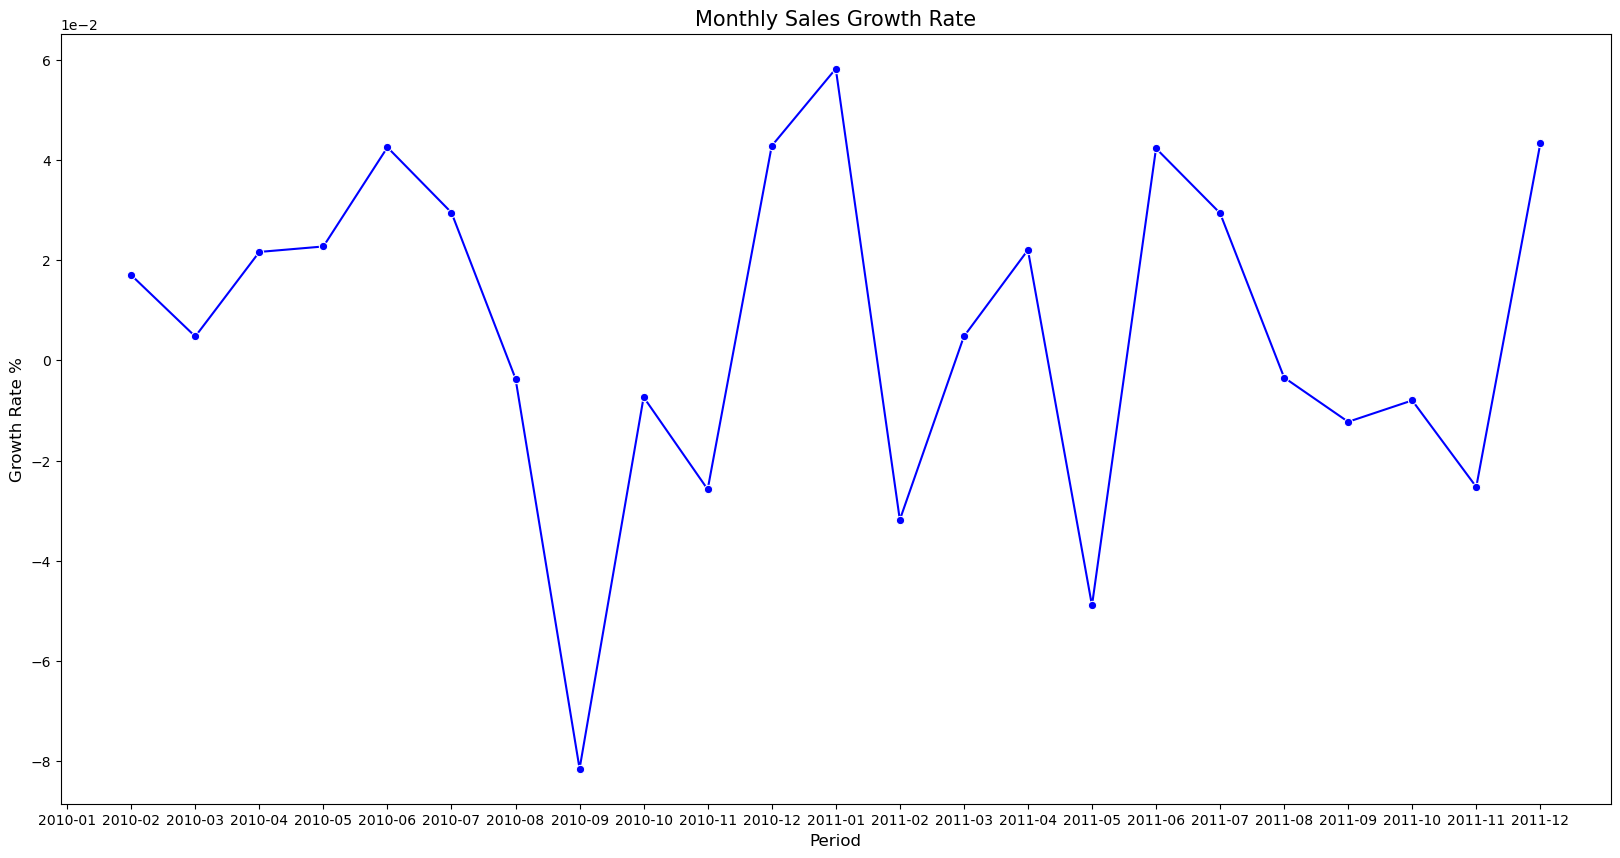

In [47]:
plt.figure(figsize = [20, 10])
sns.lineplot(data=monthly_sales, x = monthly_sales['period'].astype(str), y = 'pct_change', color = 'blue', marker = 'o')
plt.title('Monthly Sales Growth Rate', fontsize = 15)
plt.xlabel('Period', fontsize = 12)
plt.ylabel('Growth Rate %', fontsize = 12)
plt.show()

The chart illustrates the **monthly sales growth rate**, showcasing periods of both positive and negative growth:

1. **Positive Growth**:
   - Sales growth peaked mid-year in both 2010 and 2011, indicating strong performance during these months.
   - Notable spikes occurred in June-July 2010 and March-April 2011, with growth rates reaching approximately 4-6%.

2. **Negative Growth**:
   - Sharp declines are observed after the peaks, particularly in September 2010 and January 2011, with growth rates dipping to -8% during these months.
   - The cyclical pattern of sharp rises followed by steep declines highlights the seasonal nature of sales performance.

### Conclusion:
The growth rate indicates significant seasonal volatility in sales. The consistent mid-year peaks present opportunities for targeted campaigns, while the sharp post-peak declines suggest a need for strategies to sustain growth during slower periods.

## 11. Some other analysis 

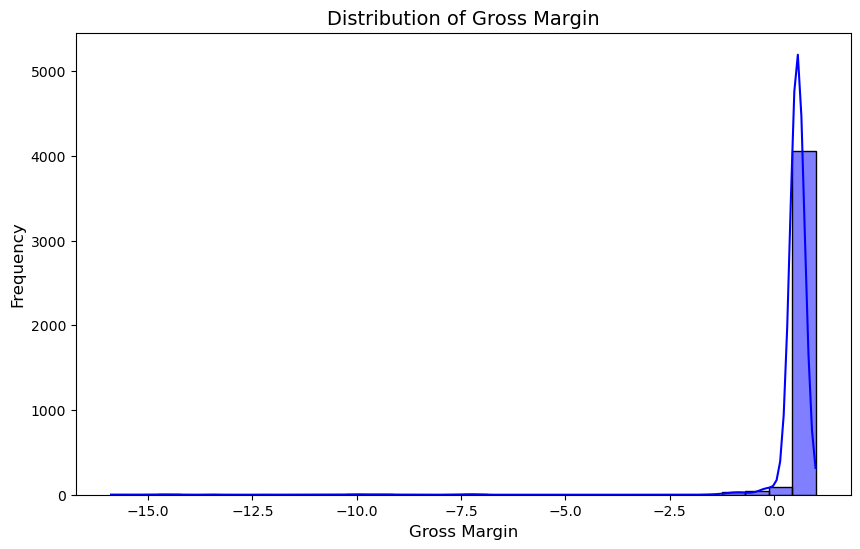

In [48]:
# Plot 1: Gross Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales['gross_margin'], bins=30, kde=True, color='blue')
plt.title('Distribution of Gross Margin', fontsize=14)
plt.xlabel('Gross Margin', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

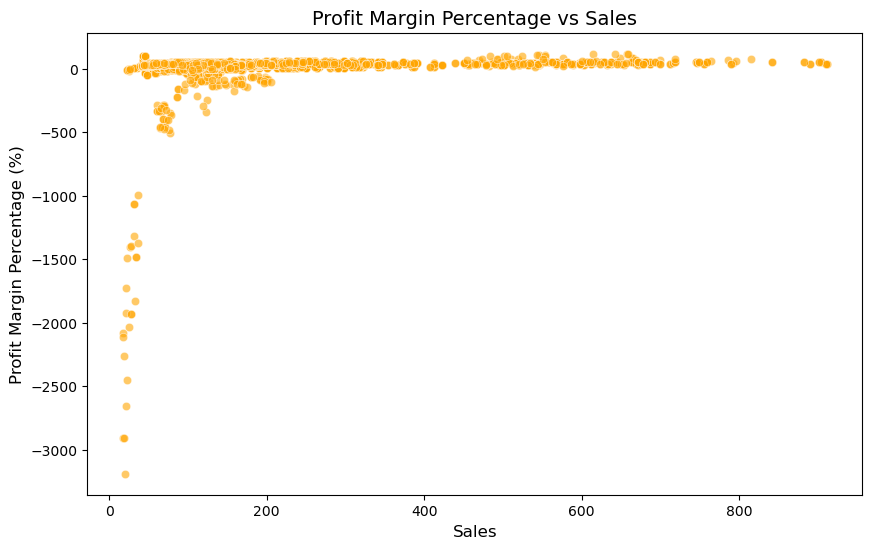

In [49]:
# Plot 2: Profit Margin Percentage vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales['sales'], y=sales['profit_margin_percentage'], color='orange', alpha=0.6)
plt.title('Profit Margin Percentage vs Sales', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit Margin Percentage (%)', fontsize=12)
plt.show()

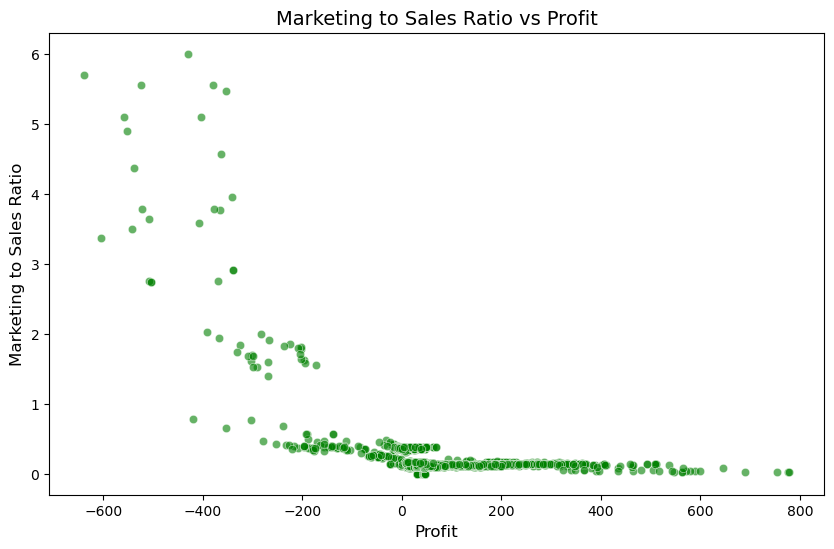

In [50]:
# Plot 3: Marketing to Sales Ratio vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales['profit'], y=sales['marketing_to_sales_ratio'], color='green', alpha=0.6)
plt.title('Marketing to Sales Ratio vs Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Marketing to Sales Ratio', fontsize=12)
plt.show()

C:\Users\Sourabh\AppData\Local\Temp\ipykernel_23512\1874138821.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_type', y='budget_actual_profit_diff', data=sales, ci=None, palette='coolwarm')
C:\Users\Sourabh\AppData\Local\Temp\ipykernel_23512\1874138821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_type', y='budget_actual_profit_diff', data=sales, ci=None, palette='coolwarm')


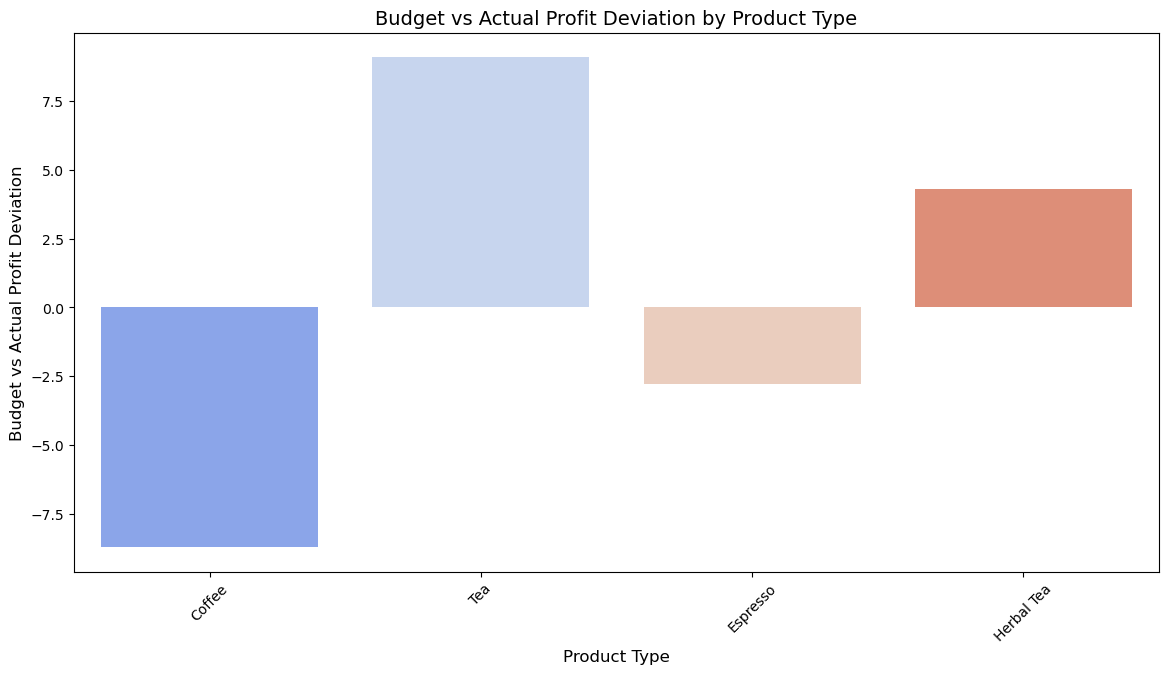

In [51]:
# Plot 4: Budget vs Actual Profit Deviation by Product Type
plt.figure(figsize=(14, 7))
sns.barplot(x='product_type', y='budget_actual_profit_diff', data=sales, ci=None, palette='coolwarm')
plt.title('Budget vs Actual Profit Deviation by Product Type', fontsize=14)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Budget vs Actual Profit Deviation', fontsize=12)
plt.xticks(rotation=45)
plt.show()


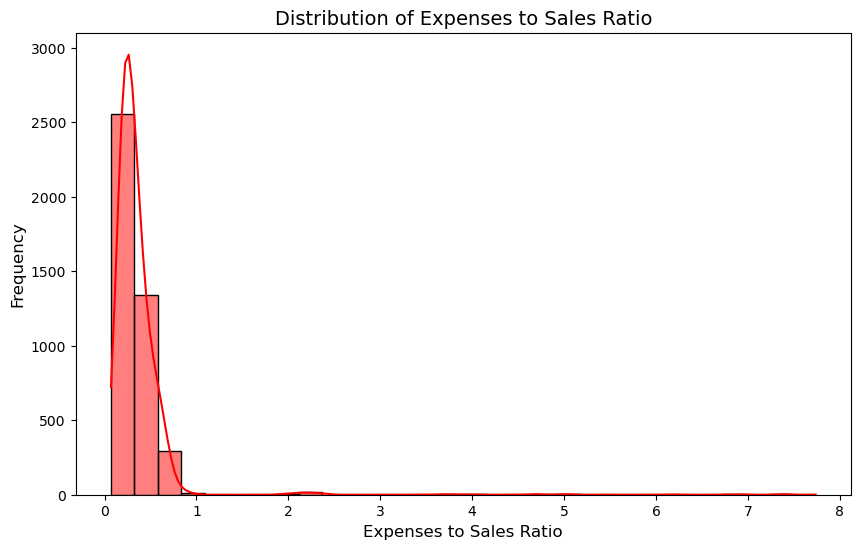

In [52]:
# Plot 5: Expenses to Sales Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales['expenses_to_sales_ratio'], bins=30, kde=True, color='red')
plt.title('Distribution of Expenses to Sales Ratio', fontsize=14)
plt.xlabel('Expenses to Sales Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Clustering Algorithm

In [53]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   area_code                        4248 non-null   int64         
 1   state                            4248 non-null   object        
 2   market                           4248 non-null   object        
 3   market_size                      4248 non-null   object        
 4   profit                           4248 non-null   float64       
 5   gross_profit                     4248 non-null   float64       
 6   sales                            4248 non-null   float64       
 7   cogs                             4248 non-null   float64       
 8   total_expenses                   4248 non-null   float64       
 9   marketing                        4248 non-null   float64       
 10  inventory                        4248 non-null   float64    

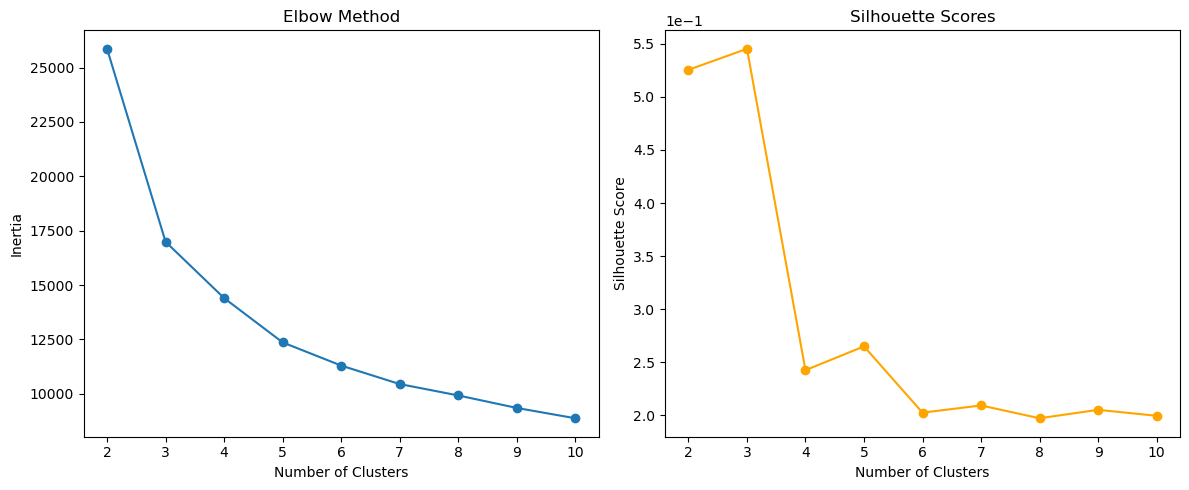


Cluster Summary:
          Count   Avg_Sales  Avg_Profit  Avg_Gross_Profit    Avg_COGS  \
Cluster                                                                
0         3763  149.201701   40.754983         80.932235   65.062716   
1          461  559.095445  254.147505        314.190889  233.164859   
2           24   25.916667 -457.500000       -264.666667  264.666667   

         Outlier_Count  
Cluster                 
0                   84  
1                  105  
2                   24  


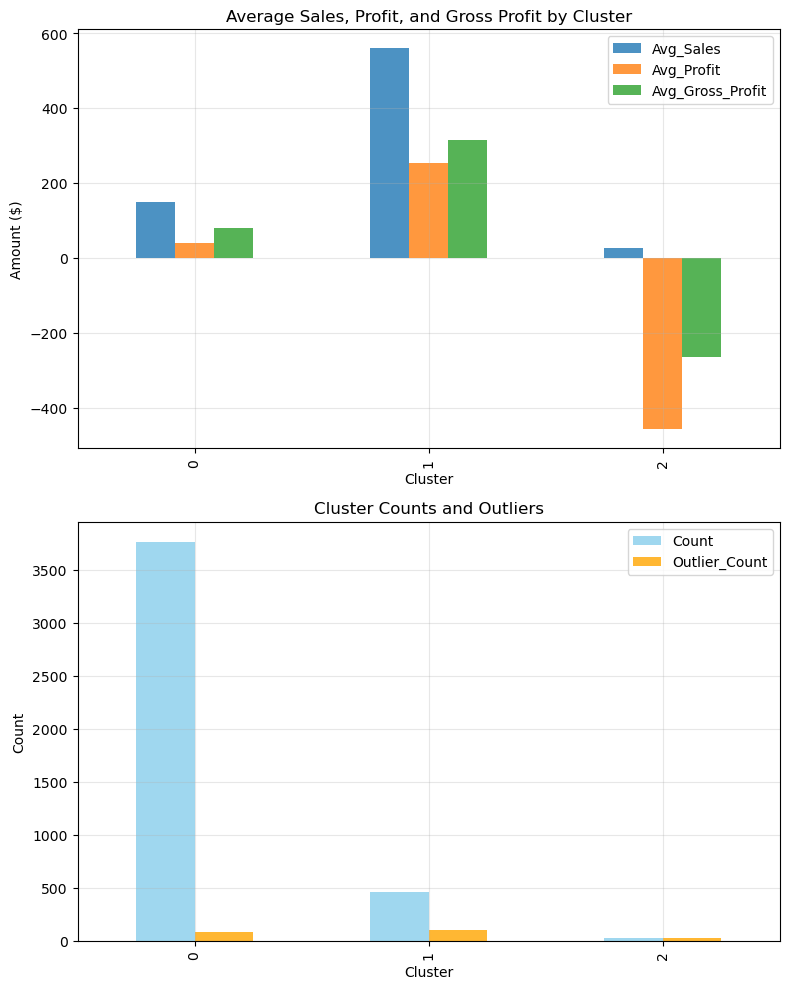


Cluster Feature Summary:
               sales      profit  gross_profit        cogs  \
Cluster                                                     
0        149.201701   40.754983     80.932235   65.062716   
1        559.095445  254.147505    314.190889  233.164859   
2         25.916667 -457.500000   -264.666667  264.666667   

         profit_margin_percentage  marketing_to_sales_ratio    inventory  
Cluster                                                                   
0                       23.105025                  0.169496   648.371512  
1                       44.697902                  0.135584  1363.379610  
2                    -1876.349746                  4.102674  4793.000000  


In [54]:
# Feature selection: Selecting relevant features for product grouping
numerical_features = [
    'sales', 'profit', 'gross_profit', 'cogs', 
    'profit_margin_percentage', 'marketing_to_sales_ratio', 
    'inventory'
]

categorical_features = ['market', 'market_size', 'product_type', 'product_category']

# Scaling numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sales[numerical_features])

# Encoding categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
data_encoded = encoder.fit_transform(sales[categorical_features])

# Combining scaled numerical and encoded categorical features
X_combined = np.hstack((data_scaled, data_encoded))

# Outlier Detection using Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outlier_pred = isolation_forest.fit_predict(data_scaled)
sales['Outlier'] = outlier_pred

# K-Means Clustering: Determining optimal clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_combined, kmeans.labels_))

# Plotting Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Applying K-Means with optimal clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
sales['Cluster'] = kmeans_optimal.fit_predict(X_combined)

# Cluster Summaries
cluster_summary = sales.groupby('Cluster').agg(
    Count=('Cluster', 'size'),
    Avg_Sales=('sales', 'mean'),
    Avg_Profit=('profit', 'mean'),
    Avg_Gross_Profit=('gross_profit', 'mean'),
    Avg_COGS=('cogs', 'mean'),
    Outlier_Count=('Outlier', lambda x: (x == -1).sum())
)
print("\nCluster Summary:\n", cluster_summary)

# Plotting the cluster summary
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Bar plot for Avg_Sales, Avg_Profit, and Avg_Gross_Profit
cluster_summary[['Avg_Sales', 'Avg_Profit', 'Avg_Gross_Profit']].plot(
    kind='bar', ax=ax[0], title="Average Sales, Profit, and Gross Profit by Cluster", alpha=0.8
)
ax[0].set_ylabel("Amount ($)")
ax[0].grid(alpha=0.3)

# Bar plot for Count and Outlier_Count
cluster_summary[['Count', 'Outlier_Count']].plot(
    kind='bar', ax=ax[1], title="Cluster Counts and Outliers", alpha=0.8, color=['skyblue', 'orange']
)
ax[1].set_ylabel("Count")
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Saving clustered data to a CSV file
sales.to_csv('refined_clustered_sales_data.csv', index=False)

# Cluster Mean Analysis
cluster_mean_features = numerical_features + ['Cluster']
cluster_feature_summary = sales[cluster_mean_features].groupby('Cluster').mean()
print("\nCluster Feature Summary:\n", cluster_feature_summary)
